In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import layers
from keras.models import Model
from keras import optimizers
from glob import glob
import pathlib
import matplotlib.pyplot as plt


In [2]:
resnet = ResNet50(input_shape = (55,55,3),include_top=False,weights='imagenet')
for layer in resnet.layers:
    layer.trainable = False
out = resnet.output

x = Flatten()(out)
x = Dense(40,activation = 'softmax')(x)

model = Model(inputs=resnet.input,outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55, 55, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 61, 61, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 28, 28, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 28, 28, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [3]:

path_train = pathlib.Path('./images/train/')
path_test = pathlib.Path('./images/test/')
train_images_files = path_test.glob('*/*.jpeg')
test_images_files = path_test.glob('*/*.jpeg')


In [4]:
train_dir = './images/train/'
validation_dir = './images/test/'

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 20

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size=(55,55),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    )

validation_generator = test_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=(55,55),
    batch_size=batch_size,
    class_mode='categorical')

Found 27761 images belonging to 40 classes.
Found 10008 images belonging to 40 classes.


In [5]:
epochs = 80
history = model.fit_generator(
    train_generator,
    steps_per_epoch= len(list(train_images_files))//batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=len(list(test_images_files))//batch_size
)

C:\Users\hp\AppData\Local\Temp\ipykernel_7896\2294731625.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/80
500/500 [==============================] - 144s 283ms/step - loss: 3.7268 - accuracy: 0.0323 - val_loss: 3.6796 - val_accuracy: 0.0430
Epoch 2/80
500/500 [==============================] - 165s 330ms/step - loss: 3.6426 - accuracy: 0.0500 - val_loss: 3.6388 - val_accuracy: 0.0528
Epoch 3/80
500/500 [==============================] - 149s 298ms/step - loss: 3.5901 - accuracy: 0.0640 - val_loss: 3.5869 - val_accuracy: 0.0599
Epoch 4/80
500/500 [==============================] - 139s 278ms/step - loss: 3.5469 - accuracy: 0.0732 - val_loss: 3.5452 - val_accuracy: 0.0651
Epoch 5/80
500/500 [==============================] - 123s 246ms/step - loss: 3.4970 - accuracy: 0.0883 - val_loss: 3.5169 - val_accuracy: 0.0897
Epoch 6/80
500/500 [==============================] - 146s 291ms/step - loss: 3.4581 - accuracy: 0.0967 - val_loss: 3.4531 - val_accuracy: 0.0878
Epoch 7/80
500/500 [==============================] - 144s 289ms/step - loss: 3.4289 - accuracy: 0.1051 - val_loss: 3.4558 -

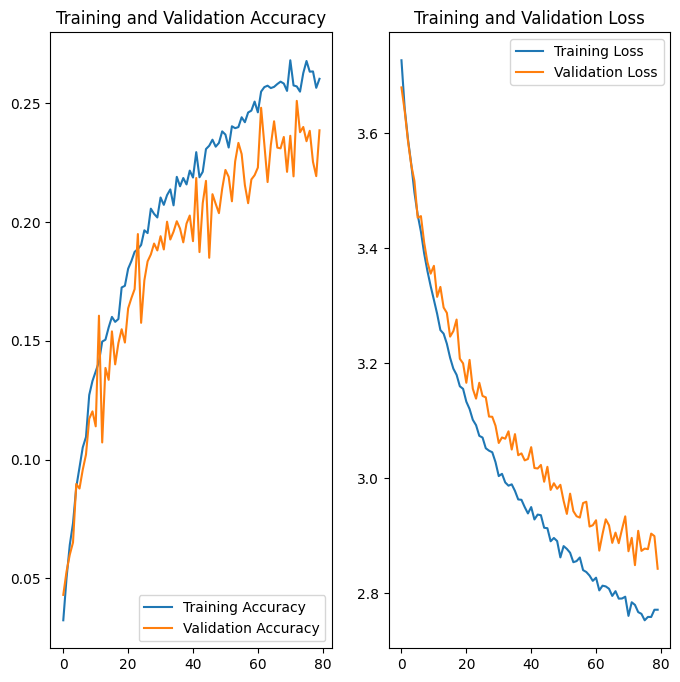

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()